In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# print(os.listdir(r'data/'))

2022-09-29 15:26:31.505341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 15:26:31.641834: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 15:26:31.641858: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-29 15:26:32.504308: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
cd data/

/home/riyaz/Desktop/Hand_Recognition/data


In [3]:
train = pd.read_csv('sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test = pd.read_csv('sign_mnist_test.csv')
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis  = 1)

In [6]:
y_test = test['label']
x_test = test.drop(labels = ['label'], axis  = 1)

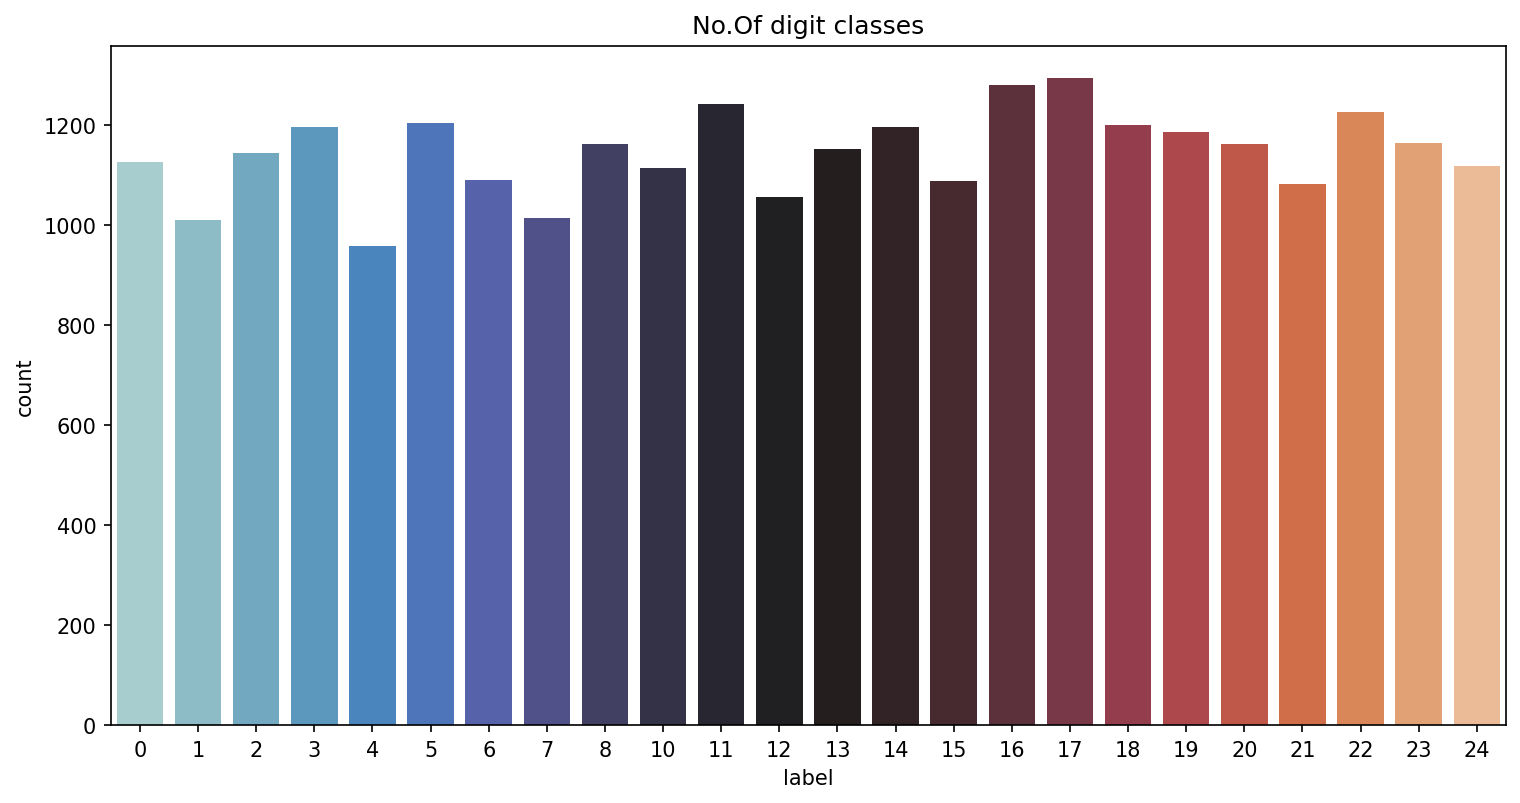

In [7]:
plt.figure(figsize = (12,6), dpi = 150)
g = sns.countplot(Y_train, palette = 'icefire')
plt.title('No.Of digit classes')
plt.show()

In [8]:
Y_train.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [9]:
type(X_train.iloc[0])

pandas.core.series.Series

(784,)


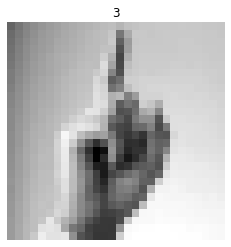

(28, 28)


In [10]:
img = X_train.iloc[0].to_numpy()
print(img.shape)
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[0,0])
plt.axis('OFF')
plt.show()
print(img.shape)

In [11]:
pwd

'/home/riyaz/Desktop/Hand_Recognition/data'

In [13]:
df = pd.read_csv('sign_mnist_train.csv')

In [14]:
df = df.set_index(df['label'])

In [15]:
df = df.drop(labels = ['label'], axis  = 1)

In [16]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
3,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
6,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
2,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
13,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


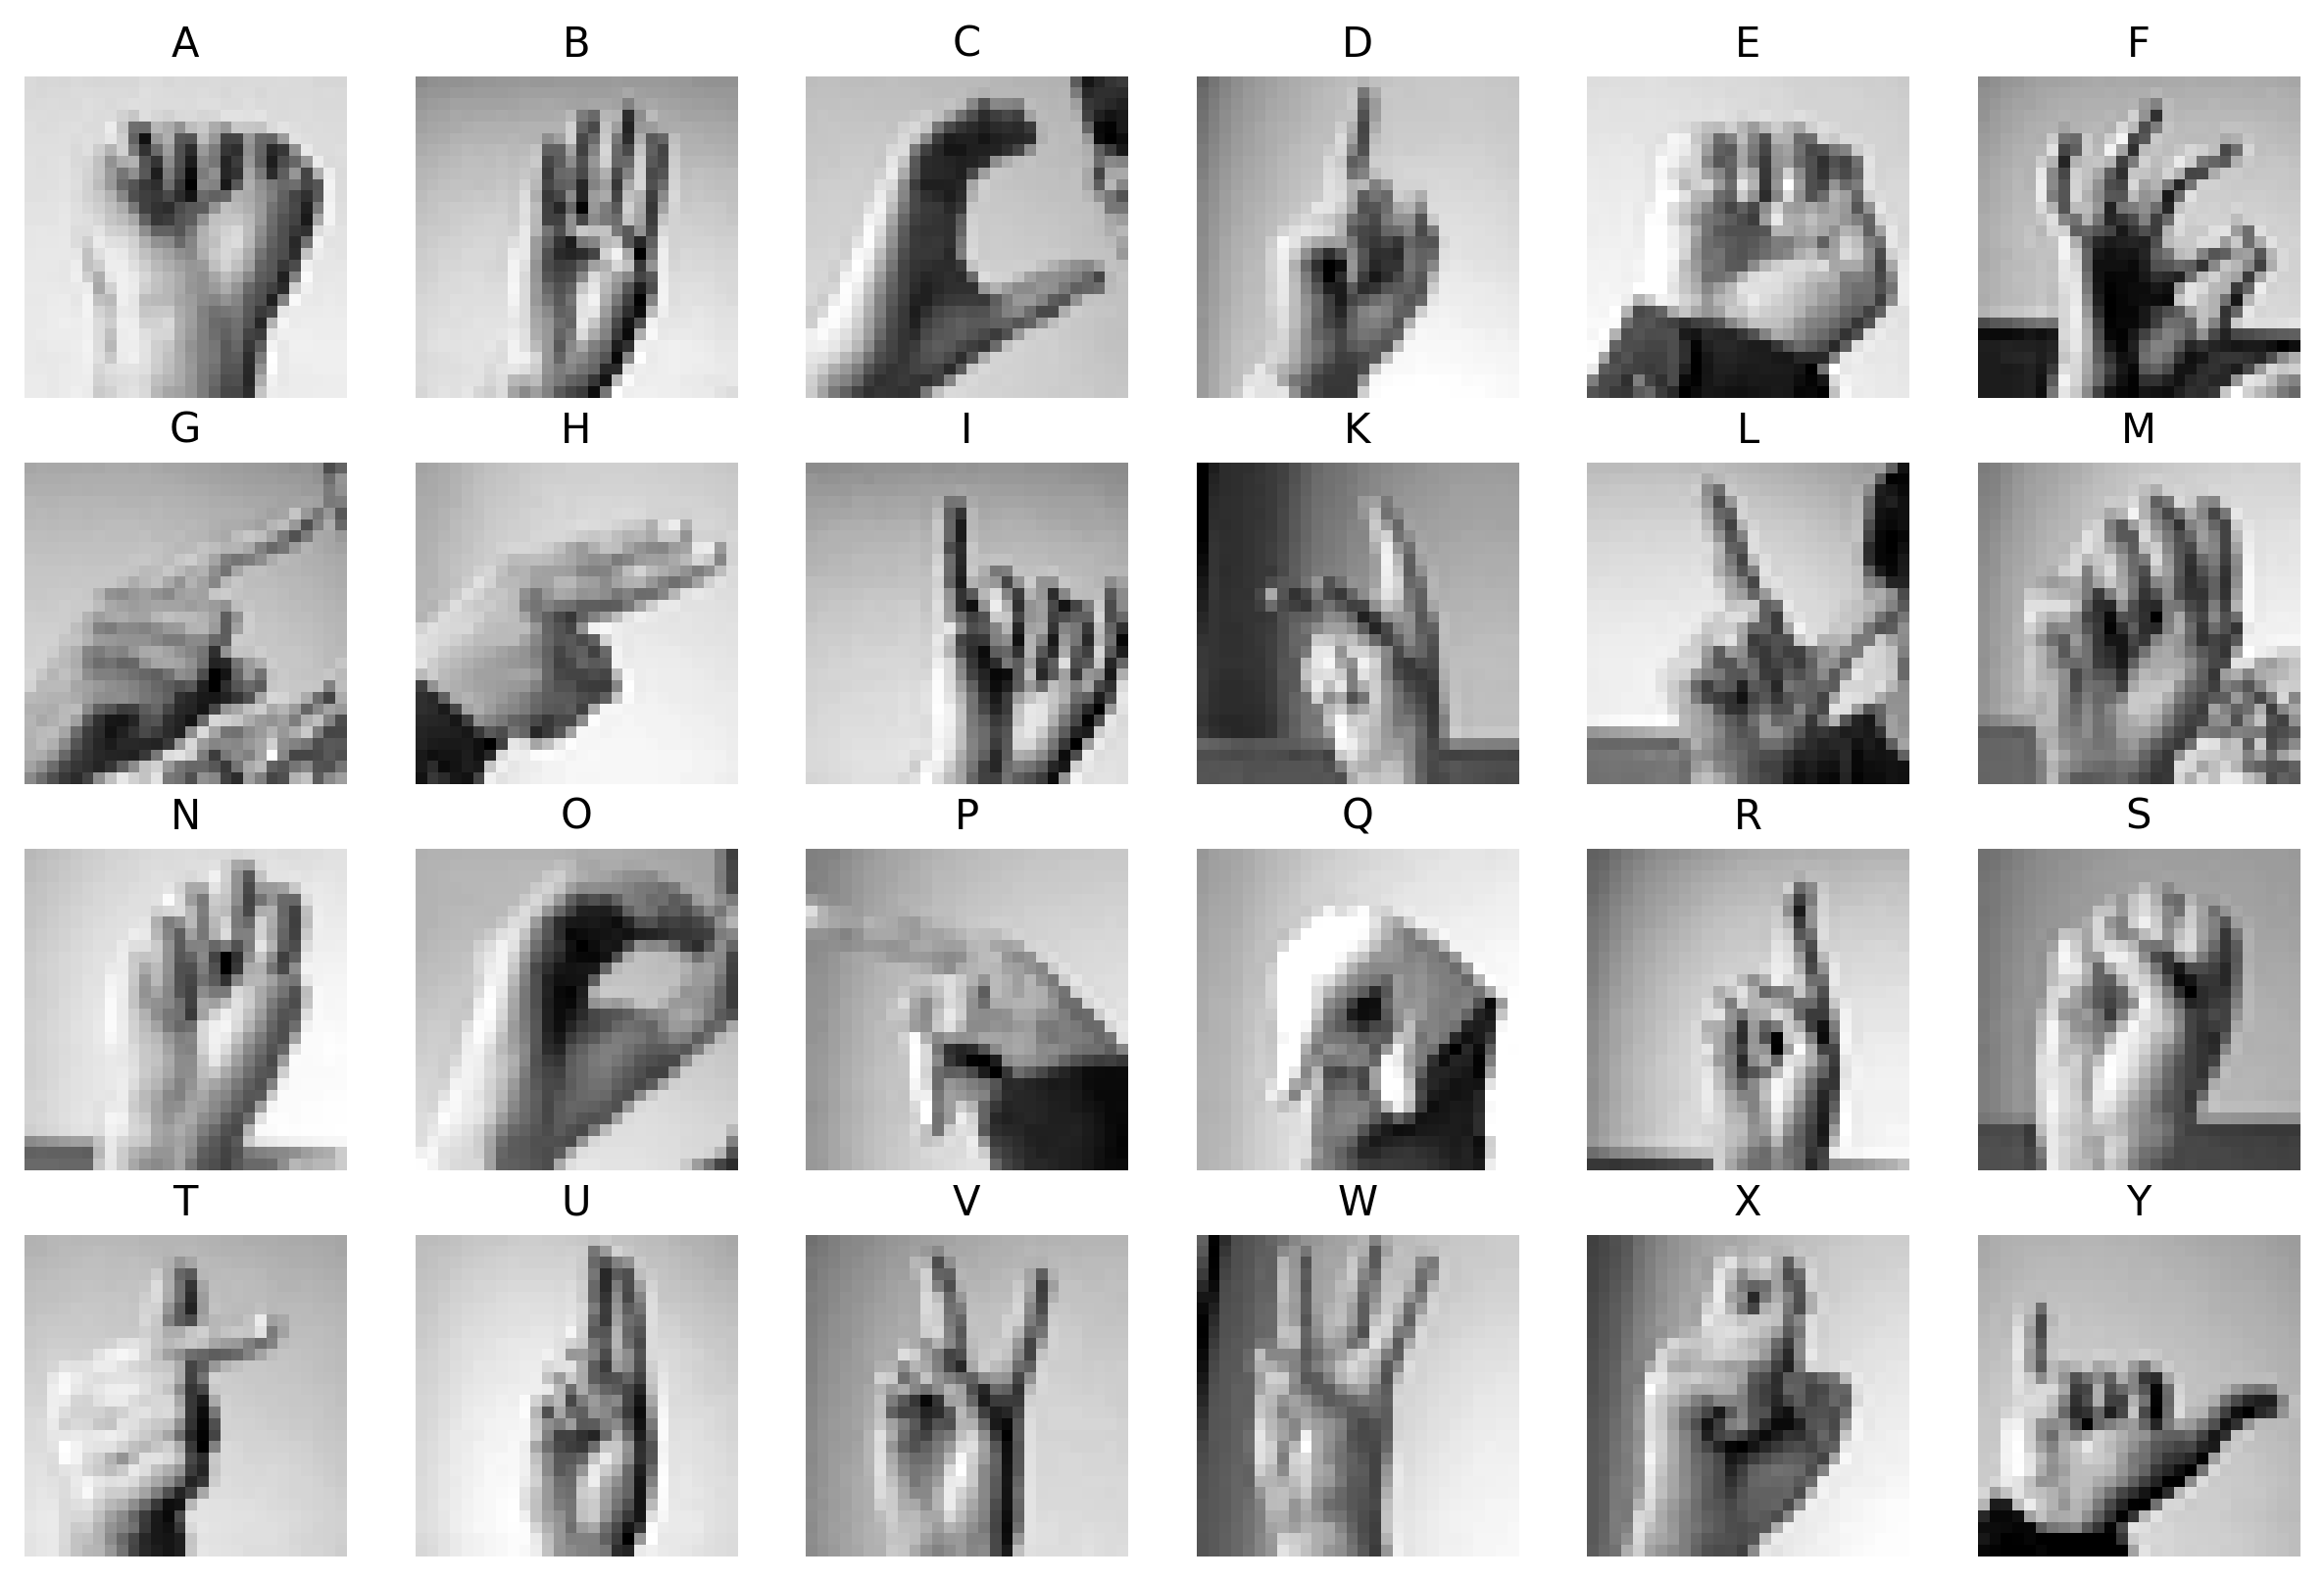

In [17]:
plt.figure(figsize=(12,8), dpi=250)
num = 1
alph = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i in range(25):
    if i == 9:
        pass
    else:
        plt.subplot(4, 6, num)
        im = df.loc[i].iloc[0].to_numpy()
        im = im.reshape(28,28)
        plt.imshow(im, cmap = 'gray')
        plt.title(alph[i])
        plt.axis('OFF')
        num += 1

In [18]:
# Normalization
X_train = X_train/ 255.0
x_test = x_test/ 255.0

print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (27455, 784)
test shape:  (7172, 785)


In [19]:
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [20]:
X_train.shape

(27455, 28, 28, 1)

In [21]:
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [22]:
x_test.shape

(7172, 28, 28, 1)

In [23]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [24]:
# Y_train = to_categorical(Y_train, num_classes = 24)

In [25]:
Y_train.value_counts().count()

24

In [26]:
Y_train = pd.get_dummies(Y_train)

In [27]:
Y_train

,0,1,2,3,4,5,6,7,8,10,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27453,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val =  train_test_split(X_train, Y_train, test_size = 0.2, random_state = 11)

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [32]:
model = Sequential()
model.add(Conv2D(28, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 28)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 56)        14168     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 56)        28280     
                                                      

In [34]:
optimizer = Adam(learning_rate = 0.0001) # learning rate and exponential decay rate, (, beta_1 = 0.9, beta_2 = 0.99)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # rho is the "Gradient moving average [also exponentially weighted average] decay factor" and decay is the "Learning rate decay over each update".

In [35]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
epochs = 100
batch_size = 75

In [37]:
datagen = ImageDataGenerator(
                            featurewise_center = False, # set input mean to 0 over the dataset
                            samplewise_center = False, # set each sample mean to 0
                            featurewise_std_normalization = False, # divide inputs by std of the dataset
                            samplewise_std_normalization = False, # divide each input by its std
                            zca_whitening = False, # dimesion reduction
                            rotation_range = 10, # randomly rotate images in the range 5 degrees
                            zoom_range = 0.2, # Randomly zoom image 10%
                            width_shift_range = 0.2, # randomly shift images horizontally 10%
                            height_shift_range = 0.2, # randomly shift images vertically 10%
                            horizontal_flip = False, # randomly flip images
                            vertical_flip = False) # randomly flip images

datagen.fit(X_train)

In [38]:
classifier = model.fit(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, 
                      validation_data = (X_val, Y_val), steps_per_epoch = 250) # callbacks=[learning_rate_reduction]

Epoch 1/100
250/250 [==============================] - 22s 84ms/step - loss: 3.1767 - accuracy: 0.0415 - val_loss: 3.1748 - val_accuracy: 0.0475
Epoch 2/100
250/250 [==============================] - 21s 83ms/step - loss: 3.1717 - accuracy: 0.0513 - val_loss: 3.1548 - val_accuracy: 0.0850
Epoch 3/100
250/250 [==============================] - 22s 89ms/step - loss: 3.0318 - accuracy: 0.0931 - val_loss: 2.7125 - val_accuracy: 0.1958
Epoch 4/100
250/250 [==============================] - 27s 107ms/step - loss: 2.8064 - accuracy: 0.1399 - val_loss: 2.3778 - val_accuracy: 0.2522
Epoch 5/100
250/250 [==============================] - 29s 116ms/step - loss: 2.6257 - accuracy: 0.1791 - val_loss: 2.2181 - val_accuracy: 0.3027
Epoch 6/100
250/250 [==============================] - 27s 106ms/step - loss: 2.4834 - accuracy: 0.2134 - val_loss: 1.9944 - val_accuracy: 0.3608
Epoch 7/100
250/250 [==============================] - 26s 106ms/step - loss: 2.3385 - accuracy: 0.2542 - val_loss: 1.7288 - va

Epoch 57/100
250/250 [==============================] - 26s 103ms/step - loss: 0.5212 - accuracy: 0.8196 - val_loss: 0.0983 - val_accuracy: 0.9714
Epoch 58/100
250/250 [==============================] - 26s 103ms/step - loss: 0.5211 - accuracy: 0.8177 - val_loss: 0.0916 - val_accuracy: 0.9740
Epoch 59/100
250/250 [==============================] - 26s 103ms/step - loss: 0.4972 - accuracy: 0.8266 - val_loss: 0.0719 - val_accuracy: 0.9820
Epoch 60/100
250/250 [==============================] - 26s 103ms/step - loss: 0.4947 - accuracy: 0.8262 - val_loss: 0.0784 - val_accuracy: 0.9803
Epoch 61/100
250/250 [==============================] - 26s 103ms/step - loss: 0.4740 - accuracy: 0.8342 - val_loss: 0.0664 - val_accuracy: 0.9865
Epoch 62/100
250/250 [==============================] - 26s 103ms/step - loss: 0.4759 - accuracy: 0.8335 - val_loss: 0.0614 - val_accuracy: 0.9873
Epoch 63/100
250/250 [==============================] - 26s 103ms/step - loss: 0.4634 - accuracy: 0.8383 - val_loss: 0

In [ ]:
model.

In [39]:
model.save('my_model_new.h5')

In [40]:
classifier.history

{'loss': [3.176724910736084,
  3.171736240386963,
  3.0317647457122803,
  2.80642032623291,
  2.6257424354553223,
  2.483351469039917,
  2.3385212421417236,
  2.1989359855651855,
  2.0658626556396484,
  1.9541741609573364,
  1.8579257726669312,
  1.7403885126113892,
  1.6572977304458618,
  1.5710585117340088,
  1.4917292594909668,
  1.4372233152389526,
  1.376955509185791,
  1.3221158981323242,
  1.2849043607711792,
  1.2326223850250244,
  1.2030633687973022,
  1.1684058904647827,
  1.1094626188278198,
  1.1040713787078857,
  1.0501365661621094,
  1.013038992881775,
  1.0031620264053345,
  0.9657280445098877,
  0.9400396943092346,
  0.9161288142204285,
  0.878625750541687,
  0.8812820315361023,
  0.8613305687904358,
  0.8257567882537842,
  0.8123069405555725,
  0.80570387840271,
  0.7555634379386902,
  0.7430319786071777,
  0.745609700679779,
  0.7227548956871033,
  0.7023725509643555,
  0.6938546895980835,
  0.6915748715400696,
  0.6620457768440247,
  0.6423762440681458,
  0.635516166

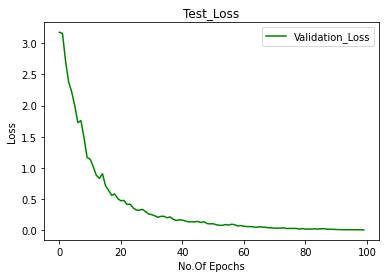

In [41]:
plt.plot(classifier.history['val_loss'], color = 'g', label = 'Validation_Loss')
plt.title('Test_Loss')
plt.xlabel('No.Of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
import seaborn as sns

Y_pred = model.predict(X_val)
pred_class = np.argmax(Y_pred, axis = 1)
# actual_class = np.argmax(Y_val, axis = 1)

actual_class = []
for i in range(5491):
    
    actual_class.append(Y_val.iloc[i].argmax())
    
# actual_class = np.array(actual_class)
pred_class = list(pred_class)

confusion_mtrx = confusion_matrix(actual_class, pred_class)
confusion_mtrx

172/172 [==============================] - 1s 7ms/step


array([[234,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 205,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 191,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 213,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 215,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

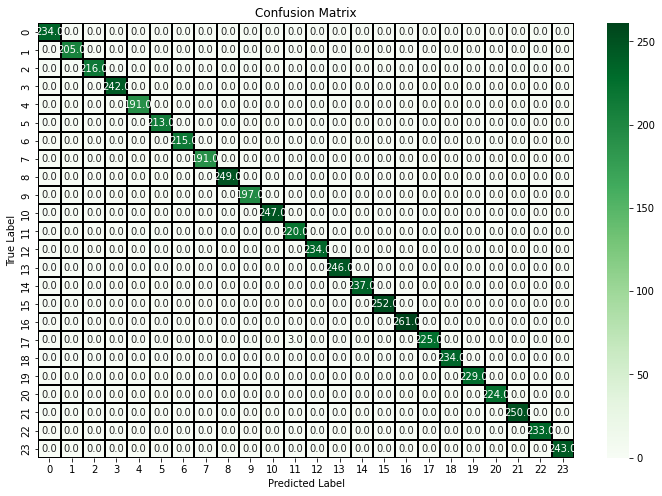

In [43]:
plt.figure(figsize = (12,8))
sns.heatmap(confusion_mtrx, annot=True, cmap = 'Greens', linewidths = 0.01, linecolor = 'black', fmt = '.1f')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [54]:
train = pd.read_csv('sign_mnist_train.csv')
print(train.shape)
train.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [55]:
test = pd.read_csv('sign_mnist_test.csv')
print(test.shape)
test.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [56]:
Y_train = train['label']
X_train = train.drop(labels = ['label'], axis  = 1)

In [57]:
y_test = test['label']
x_test = test.drop(labels = ['label'], axis  = 1)

In [17]:
os.chdir(r'../datasets/')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
#     os.mkdir('valid')
    os.mkdir('valid')
    
    for i in range(0,25):
        if i == 9:
            pass
        else: 
    #         shutil.move(f'{i}', 'train')
            os.mkdir(f'train/{i}')
    #         os.mkdir(f'valid/{i}')
            os.mkdir(f'valid/{i}')

In [18]:
import shutil
import cv2 as cv
for j in range(len(Y_train)):

    img = X_train.iloc[j].to_numpy()
    img = img.reshape(28,28)
    cv.imwrite(f'{str(j)}{str(Y_train[j])}.jpg', img)
    shutil.move(f'{str(j)}{str(Y_train[j])}.jpg', f'train/{Y_train[j]}')

In [19]:
os.mkdir('pred')    
for k in range(len(x_test)):
    img = x_test.iloc[k].to_numpy()
    img = img.reshape(28,28)
    cv.imwrite(f'{str(k)}{str(3*len(x_test) - k)}.jpg', img)
    shutil.move(f'{str(k)}{str(3*len(x_test) - k)}.jpg', f'pred')

# os.chdir('./.')

In [20]:
import random
for i in range(0,25):
    if i == 9:
        pass
    else: 
        valid_samples = random.sample(os.listdir(f'train/{i}'), 300)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

In [22]:
os.mkdir('test') 
for i in range(0,25):
        if i == 9:
            pass
        else: 
            os.mkdir(f'test/{i}')


In [23]:
for i in range(0,25):
    if i == 9:
        pass
    else:
        test_samples = random.sample(os.listdir(f'train/{i}'), 100)
        for j in test_samples:
            shutil.move(f'train/{i}/{j}', f'test/{i}')

In [4]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [59]:
cd datasets/

/home/riyaz/Desktop/Hand_Recognition/data/datasets


In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=train_path, batch_size=75, target_size = (28,28))

Found 17855 images belonging to 24 classes.


In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=test_path, batch_size=75, shuffle=False, target_size = (28,28))

Found 2400 images belonging to 24 classes.


In [7]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
                                  directory=valid_path, batch_size=75, target_size = (28,28))

Found 7200 images belonging to 24 classes.


In [63]:
# mobile = tf.keras.applications.mobilenet.MobileNet()

In [64]:
# mobile.summary()

In [65]:
# x = mobile.layers[-5].output
# y = tf.reshape(x, shape=(-1, 1024))
# output = Dense(units=24, activation='softmax')(y)

In [66]:
# model = tf.keras.Model(inputs=mobile.input, outputs=output)

In [67]:
# len(model.layers)

In [68]:
# for layer in model.layers[:-23]:
#     layer.trainable = False

In [69]:
# model.summary()

In [79]:
model = Sequential()
model.add(Conv2D(28, (3, 3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(56, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 28)        784       
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 28)        7084      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 28)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 56)        14168     
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 56)        28280     
                                                      

In [81]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=50, verbose=2)

Epoch 1/50
239/239 - 29s - loss: 3.0963 - accuracy: 0.0728 - val_loss: 2.8083 - val_accuracy: 0.1894 - 29s/epoch - 120ms/step
Epoch 2/50
239/239 - 20s - loss: 2.4962 - accuracy: 0.2306 - val_loss: 1.7627 - val_accuracy: 0.4913 - 20s/epoch - 85ms/step
Epoch 3/50
239/239 - 21s - loss: 1.7710 - accuracy: 0.4141 - val_loss: 1.0591 - val_accuracy: 0.6794 - 21s/epoch - 89ms/step
Epoch 4/50
239/239 - 24s - loss: 1.3669 - accuracy: 0.5241 - val_loss: 0.7800 - val_accuracy: 0.7614 - 24s/epoch - 100ms/step
Epoch 5/50
239/239 - 24s - loss: 1.1052 - accuracy: 0.6113 - val_loss: 0.5911 - val_accuracy: 0.8211 - 24s/epoch - 99ms/step
Epoch 6/50
239/239 - 25s - loss: 0.9393 - accuracy: 0.6666 - val_loss: 0.4559 - val_accuracy: 0.8779 - 25s/epoch - 104ms/step
Epoch 7/50
239/239 - 26s - loss: 0.8046 - accuracy: 0.7199 - val_loss: 0.3756 - val_accuracy: 0.8856 - 26s/epoch - 108ms/step
Epoch 8/50
239/239 - 26s - loss: 0.6979 - accuracy: 0.7514 - val_loss: 0.2956 - val_accuracy: 0.9182 - 26s/epoch - 108ms/

In [8]:
test_labels = test_batches.classes

In [9]:
test_labels

array([ 0,  0,  0, ..., 23, 23, 23], dtype=int32)

In [85]:
model.save('hand_write_digit_new.h5')

In [86]:
model = tf.keras.models.load_model('hand_write_digit_new.h5')

In [87]:
pred = model.predict(x=test_batches, verbose=0)

In [88]:
cm = confusion_matrix(y_true=test_labels, y_pred = pred.argmax(axis=1))

In [10]:
dict_alph = test_batches.class_indices

In [11]:
dict_alph

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23}

In [12]:
new_dict = dict([(value, key) for key, value in dict_alph.items()])

In [13]:
new_dict

{0: '0',
 1: '1',
 2: '10',
 3: '11',
 4: '12',
 5: '13',
 6: '14',
 7: '15',
 8: '16',
 9: '17',
 10: '18',
 11: '19',
 12: '2',
 13: '20',
 14: '21',
 15: '22',
 16: '23',
 17: '24',
 18: '3',
 19: '4',
 20: '5',
 21: '6',
 22: '7',
 23: '8'}

In [14]:
alph = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [15]:
alph[25]

'Z'

In [94]:
disp = ConfusionMatrixDisplay(cm, display_labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'])

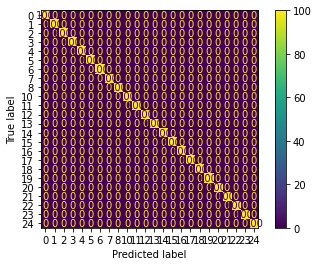

In [95]:
%matplotlib inline

disp.plot()

# disp.plot(cmap = plt.cm.Blues)

In [96]:
# from PIL import Image
# im = Image.open('5.jpg')
import cv2 as cv
model = tf.keras.models.load_model('hand_write_digit_new.h5')

im_c = cv.imread('pred/6921447.jpg')
im = cv.cvtColor(im_c, cv.COLOR_BGR2RGB)

re_size=cv.resize(im,(28,28))
norm=re_size/255.0
reshap=np.reshape(norm,(1,28,28,3))
reshap = np.vstack([reshap])


pred = model.predict(reshap)
# np.argmax(pred)
ky = np.argmax(pred,axis=1)[0]
print(alph[int(new_dict[ky])])

1/1 [==============================] - 0s 69ms/step
E


In [2]:
cd data/datasets/

/home/riyaz/Desktop/Hand_Recognition/data/datasets


In [32]:
import numpy as np
import cv2 as cv
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model


model = tf.keras.models.load_model('hand_write_digit_new.h5')

cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
cap.set(10,150)


while True: 
    
    _, frame = cap.read()
    
#     crop_img = frame #[10:234, 100:334]
    
#     im = cv.cvtColor(crop_img, cv.COLOR_BGR2RGB) # importent
        
    re_sized=cv.resize(frame,(28,28))
    normalized=re_sized/255.0
    reshaped=np.reshape(normalized,(1,28,28,3))
    reshaped = np.vstack([reshaped])
    cv.imshow('reshaped', reshaped.reshape(28, 28,3))

    
#     cv.imshow("reshaped",reshaped)
    
    pred = model.predict(reshaped)
    a = np.argmax(pred,axis=1)[0]

#     cv.rectangle(frame,(10,100),(234, 334),(0,255,0),2)
    cv.putText(frame,'Predicted Gesture : ' + alph[int(new_dict[a])],
                    (50,50),cv.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)
    
    cv.imshow("Original Image",frame)
    key = cv.waitKey(1)
    if key == 27:
        break

cap.release()        
cv.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step
